# Traditional ML

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, multilabel_confusion_matrix, classification_report

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

import pickle

import warnings
warnings.filterwarnings('ignore')

In [18]:
dataset_path = 'full_dataset/full_dataset.csv'
data = pd.read_csv(dataset_path)
data

,emotion,original_text,text_tokens,preprocessed_text
0,happiness,"During the period of falling in love, each tim...","['period', 'falling', 'love', 'time', 'met', '...",period falling love time met especially met lo...
1,fear,When I was involved in a traffic accident.,"['involved', 'traffic', 'accident']",involved traffic accident
2,anger,When I was driving home after several days of...,"['driving', 'home', 'several', 'day', 'hard', ...",driving home several day hard work motorist ah...
3,sadness,When I lost the person who meant the most to me.,"['lost', 'person', 'meant']",lost person meant
4,disgust,The time I knocked a deer down - the sight of ...,"['time', 'knocked', 'deer', 'sight', 'animal',...",time knocked deer sight animal injury helpless...
...,...,...,...,...
9801,shame,He gets real humiliated and has to leave .,"['get', 'real', 'humiliated', 'leave']",get real humiliated leave
9802,shame,They aimed for higher status jobs and felt hum...,"['aimed', 'higher', 'status', 'job', 'felt', '...",aimed higher status job felt humiliated unempl...
9803,shame,He cursed his lack of self-control ; he knew t...,"['cursed', 'lack', 'selfcontrol', 'knew', 'old...",cursed lack selfcontrol knew old biddy seen fe...
9804,shame,Sometimes I've thought I 'll never forget wha...,"['sometimes', 'ive', 'thought', 'never', 'forg...",sometimes ive thought never forget happened co...


In [19]:
class_names = data['emotion'].unique()

In [20]:
X = data['original_text']
Y = data['emotion']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=357)

print("Training set size = ", X_train.shape[0])
print("Test set size = ", X_test.shape[0])

Training set size =  7844
Test set size =  1962


## Klasifikatori

In [21]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [22]:
def cleanText(text):
    text = text.lower()

    # Remove links
    text = re.sub(r"http\S*|\S*\.com\S*|\S*www\S*", " ", text)

    # Remove @mentions
    text = re.sub(r"\s@\S+", " ", text)

    # Remove all punctuation
    punctuation_table = str.maketrans("", "", string.punctuation)
    text = text.translate(punctuation_table)

    # Replace multiple spaces with a single space
    text = re.sub(r"\s+", " ", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = [token for token in tokens if len(token)>2]

    return tokens

In [23]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=cleanText, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data['original_text'])

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

### Naive Bayes

Accuracy: 58.00%

F1 Score: 58.00

Confusion Matrix:
 [[244   3  24   5  30  35   1   0]
 [ 57  65  41   1  35  24   2   0]
 [ 17   1 219   0  27  22   2   0]
 [ 70   1  26  33  27  42   5   0]
 [ 11   1  12   0 247  14   1   0]
 [ 26   0  16   0  45 258   0   0]
 [ 56   7  23   5  43  34  72   0]
 [  5   0   7   0   8  12   0   0]]


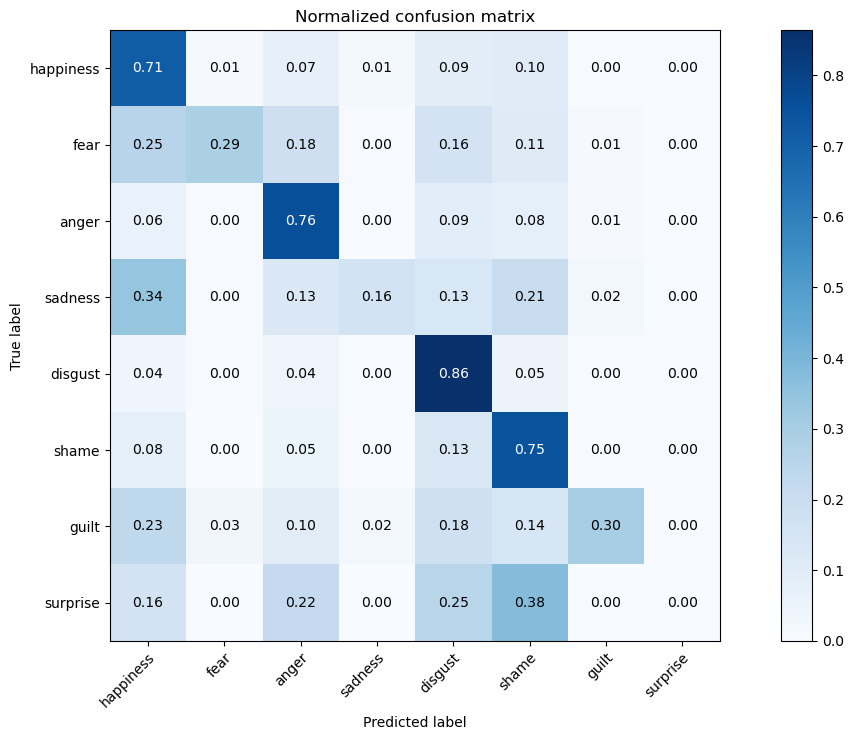

In [35]:
naive_bayes_model = MultinomialNB()

naive_bayes_model.fit(X_train_vect, Y_train)

y_pred_naive_bayes = naive_bayes_model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred_naive_bayes) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(Y_test, y_pred_naive_bayes, average='micro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_naive_bayes))

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred_naive_bayes, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

### Logistic Regression

Accuracy: 64.32%

F1 Score: 64.32

Confusion Matrix:
 [[249  18  19  11  21  21   3   0]
 [ 35 126  21   5  24  11   3   0]
 [ 15   2 234   2  15  16   4   0]
 [ 55   5  23  70  19  23   9   0]
 [ 16   0  10   1 244  13   2   0]
 [ 31   7  21   2  42 241   1   0]
 [ 54  13  18  17  31  11  96   0]
 [  8   1   6   1  11   3   0   2]]


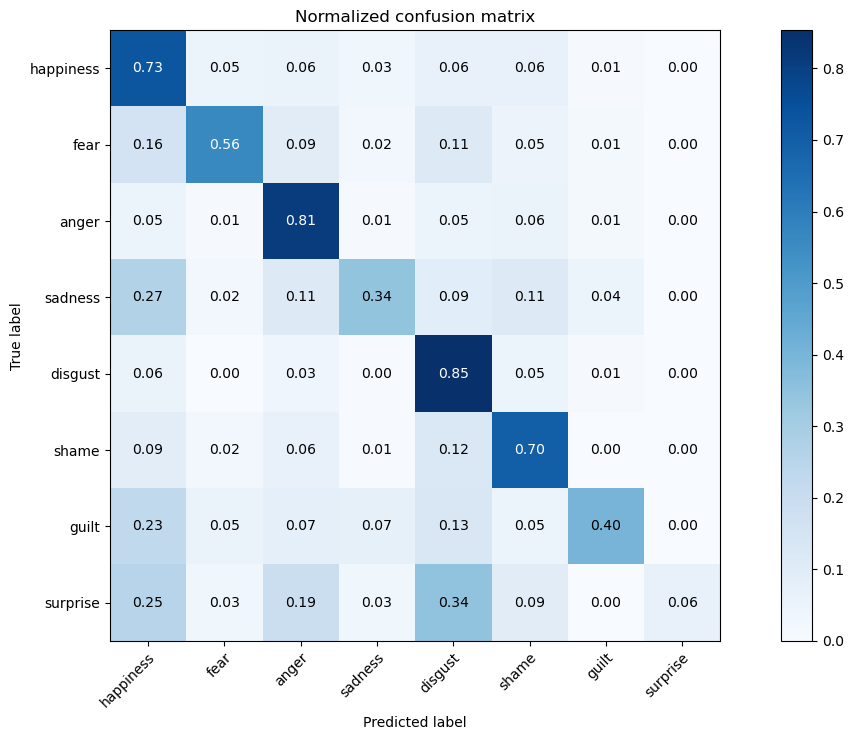

In [34]:
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
lr_model.fit(X_train_vect, Y_train)

y_pred_lr = lr_model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred_lr) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(Y_test, y_pred_lr, average='micro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_lr))

plot_confusion_matrix(Y_test, y_pred_lr, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

### SVM

Accuracy: 68.60%

F1 Score: 68.60

Confusion Matrix:
 [[239  23  11  24  20  15  10   0]
 [ 22 142  16   8  13  11  13   0]
 [ 14   3 234   4  11  14   7   1]
 [ 38   9  14  97  11  21  14   0]
 [  8   3  10   3 250  10   2   0]
 [ 23  12  18   8  33 246   5   0]
 [ 34  19  14  25  23  14 111   0]
 [  1   0   2   0   1   1   0  27]]


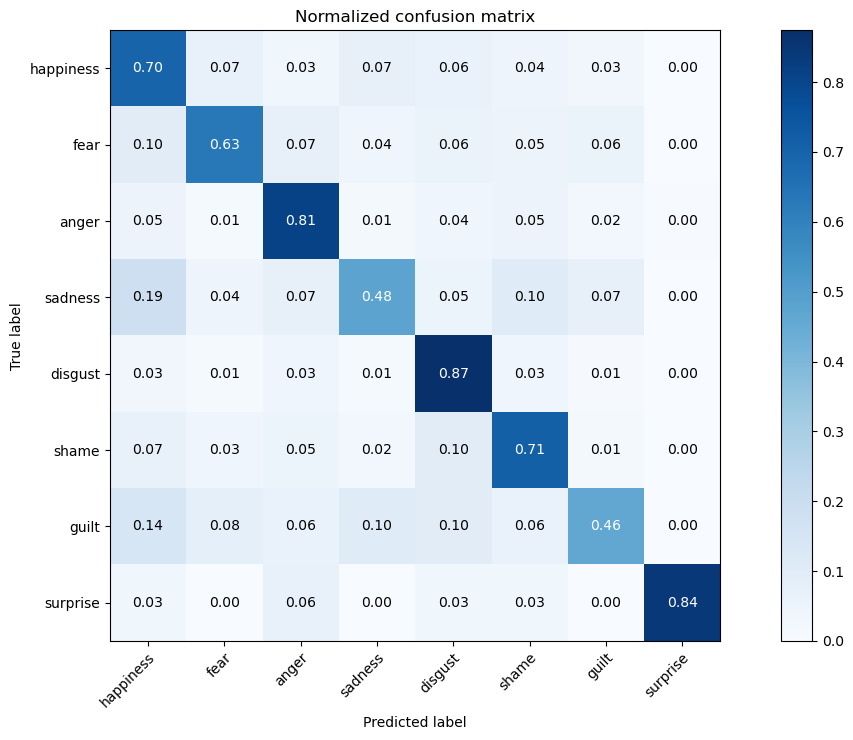

In [33]:
svc_model = LinearSVC(tol=1e-05)
svc_model.fit(X_train_vect, Y_train)

y_pred_svm = svc_model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred_svm) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(Y_test, y_pred_svm, average='micro') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))

plot_confusion_matrix(Y_test, y_pred_svm, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## Spremanje modela

In [27]:
import joblib

In [28]:
naive_bayes_pipeline = Pipeline([
    ('tfidf', vect),
    ('nb', naive_bayes_model),
])

joblib.dump(naive_bayes_pipeline, 'models/naive_bayes_pipeline.pkl')

['models/naive_bayes_pipeline.pkl']

In [29]:
logistic_regression_pipeline = Pipeline([
    ('tfidf', vect),
    ('nb', lr_model),
])

joblib.dump(logistic_regression_pipeline, 'models/logistic_regression_pipeline.pkl')

['models/logistic_regression_pipeline.pkl']

In [31]:
svm_pipeline = Pipeline([
    ('tfidf', vect),
    ('clf', svc_model),
])

joblib.dump(svm_pipeline, 'models/svm_pipeline.pkl')

['svm_pipeline.pkl']

In [32]:
filename = "models/svm_pipeline.pkl"
model = joblib.load(filename, 'r')

message = 'I love Christmas'
print("Predicted emotion:", list(model.predict([message]))[0])

Predicted emotion: happiness
